**Тестирование определения границ окружности и её обрезки**

In [2]:
import cv2
import PIL
from PIL import Image

from src.utils import TrasholdCutter

img = cv2.imread('../pictures/rec_00400.tif')
filterd_image  = cv2.medianBlur(img, 7)
filterd_image = cv2.cvtColor(filterd_image, cv2.COLOR_BGR2GRAY)
img_cutter = TrasholdCutter()
cutted_data = img_cutter.cut_data(filterd_image)
PIL.Image.fromarray(cutted_data).show()


**Тестирование предобработки изображения**

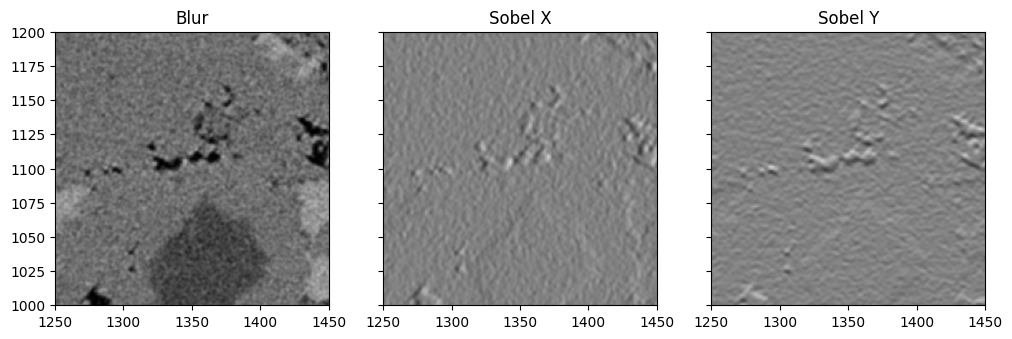

In [9]:
from src.Preparer import Preparer
from matplotlib import pyplot as plt
import cv2

img = cv2.imread('../pictures/rec_00400.tif')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

(data_blur, sobelx, sobely) = Preparer.calculate(data=img, kernel_size=3, sobel_kernel_size=5)


fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
axs[0].imshow(data_blur, cmap='gray')
axs[0].set_title('Blur')
axs[0].set_xlim([1250, 1450])  # Выбираемая область по оси x
axs[0].set_ylim([1000, 1200])
axs[1].imshow(sobelx, cmap='gray')
axs[1].set_title('Sobel X')
axs[2].imshow(sobely, cmap='gray')
axs[2].set_title('Sobel Y')
plt.show()


**Тестирование аугментации**

In [11]:
from src.Augmentator import Augmentator
import cv2
import numpy as np
from matplotlib import pyplot as plt
from src.Preparer import Preparer

img = cv2.imread('../pictures/rec_00400.tif')
img = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

data_blur, sobelx, sobely = Preparer.calculate(data=img, kernel_size=3, sobel_kernel_size=3)

augmented_data = Augmentator().augment_data(data_blur, sobelx, sobely)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), sharex=True, sharey=True)
axs[0].imshow(augmented_data[0], cmap='gray')
axs[0].set_title('Original')
axs[1].imshow(augmented_data[1], cmap='gray')
axs[1].set_title('Rotated')
axs[2].imshow(augmented_data[2], cmap='gray')
axs[2].set_title('Flipped')
plt.show()


error: OpenCV(4.9.0) d:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function '__cdecl cv::impl::`anonymous-namespace'::CvtHelper<struct cv::impl::`anonymous namespace'::Set<1,-1,-1>,struct cv::impl::A0x59191d0d::Set<3,4,-1>,struct cv::impl::A0x59191d0d::Set<0,2,5>,4>::CvtHelper(const class cv::_InputArray &,const class cv::_OutputArray &,int)'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 3
